### PROJECT INTRODUCTION - Client: Sales Effectiveness | Category: Product Sales
#### Project Ref: PM-PR-0019

FicZon Inc is an IT solution provider with products ranging from onpremises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website. FicZon business is majorly dependent on the sales force effectiveness.

As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales. Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation. 

FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

**PROJECT GOAL:**

1. Data exploration insights – Sales effectiveness
2. ML model to predict the Lead Category (High Potential , Low Potential)

### BUSINESS CASE 1: Data exploration insights – Sales effectiveness

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import sqlalchemy as sa

import warnings
warnings.filterwarnings('ignore')

# To print untruncated data

np.set_printoptions(threshold = np.inf)

### Installing PYMYSQL  to access the data set

In [2]:
!pip install pymysql

In [3]:
import pymysql

### Loading the Data set

In [4]:
db = pymysql.connect(
    host="18.136.157.135",
    user="dm_team2",
    password="DM!$Team&27@9!20!",
    database="project_sales",
    port=3306
)
print("Connection successful")

Connection successful


In [5]:
new = pd.read_sql_query('show tables', db)

print(new)

  Tables_in_project_sales
0                    data


In [6]:
table_name = 'data'
table_details = pd.read_sql_query(f'DESCRIBE {table_name}', db)
print(table_details)

           Field          Type Null Key Default Extra
0        Created  varchar(150)  YES        None      
1     Product_ID  varchar(150)  YES        None      
2         Source  varchar(150)  YES        None      
3         Mobile  varchar(150)  YES        None      
4          EMAIL  varchar(150)  YES        None      
5    Sales_Agent  varchar(255)  YES        None      
6       Location  varchar(255)  YES        None      
7  Delivery_Mode  varchar(255)  YES        None      
8         Status  varchar(255)  YES        None      


In [7]:
query = 'select * from data'
data = pd.read_sql(query, db)
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


### Domain Analysis

1. **Created:** This refers to the date and time on which the data was stored or created into the system.
2. **Product_ID:** This is the unique ID provided to each product sold.
3. **Source:** This refers to the mode how the product was sold out like through website or call etc.
4. **Mobile:** This is the contact number of the sales agent.
5. **EMAIL:** This refers to the email ID of the sales agent.
6. **Sales_Agent:** This is the number ID provided to the sales agent who sold that particular product.
7. **Location:** This provides the location where the product was sold.
8. **Delivery_Mode:** This is the record of the way how the delivery of the product was made. It is coded from Mode-1 to Mode-5.
9. **Status:** This is the target column which provides information about the status of the product whether the sale is under process or enquiry is still ongoing etc.

### Basic Checks and Statistical Analysis

In [8]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [9]:
data.shape

(7422, 9)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [11]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

**Observation:**
- No NULL values
- All records are of categorical data type.

In [12]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


**Observation:**
- '#VALUE!' is corrupt data which should be handled

## Exploratory Data Analysis

In [13]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


### Univariate Anlysis - Sweetviz Report

In [14]:
# Installation

!pip install sweetviz

In [15]:
import sweetviz as sv

report = sv.analyze(data)
report.show_html()

                                             |                                                          | [  0…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**File Path:file:///C:/Users/shaik%20sadiq/SWEETVIZ_REPORT.html**

##### Dropping Unwanted columns 'Created', 'Mobile' and 'EMAIL'

In [16]:
data_new = data.drop(['Created','Mobile','EMAIL'], axis = 1)

In [17]:
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,,Website,Sales-Agent-11,,Mode-5,Open
1,,Website,Sales-Agent-10,,Mode-5,Open
2,,Website,Sales-Agent-10,,Mode-5,Open
3,,Website,Sales-Agent-10,,Mode-5,Open
4,,Website,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


##### Dropping Missing Data

In [18]:
data_new.replace('', np.nan, inplace = True)
data_new.dropna(inplace = True)
data_new.reset_index(inplace = True, drop = True)

In [19]:
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
2,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive
...,...,...,...,...,...,...
7323,9,Call,Sales-Agent-6,Mumbai,Mode-4,LOST
7324,15,Call,Sales-Agent-12,Other Locations,Mode-5,LOST
7325,5,Live Chat-Direct,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7326,21,CRM form,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [20]:
data_new.shape

(7328, 6)

#### Categorizing the Data set
We can categorize Product_ID, Source, Location and Status column.

#### 1. Categorizing Product_ID

##### Getting the unique and sorting them in ascending order

In [21]:
np.sort(data_new.Product_ID.unique().astype(int))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [22]:
product_id_counts = data_new['Product_ID'].value_counts()

# Display the counts

print(product_id_counts)

Product_ID
18    1706
15    1501
19    1188
9      990
27     737
5      484
10     168
1      104
20     101
25      90
21      65
2       38
12      36
26      31
14      27
11      12
22       8
3        7
6        7
8        6
17       6
13       4
16       3
24       2
23       2
0        2
28       1
7        1
4        1
Name: count, dtype: int64


##### Finding Percentile for each value

In [23]:
from scipy.stats import percentileofscore

def calculate_percentile(x):
    return percentileofscore(product_id_counts, x, kind = 'rank')

percentile = product_id_counts.apply(calculate_percentile)

print(percentile)

Product_ID
18    100.000000
15     96.551724
19     93.103448
9      89.655172
27     86.206897
5      82.758621
10     79.310345
1      75.862069
20     72.413793
25     68.965517
21     65.517241
2      62.068966
12     58.620690
26     55.172414
14     51.724138
11     48.275862
22     44.827586
3      39.655172
6      39.655172
8      32.758621
17     32.758621
13     27.586207
16     24.137931
24     17.241379
23     17.241379
0      17.241379
28      6.896552
7       6.896552
4       6.896552
Name: count, dtype: float64


##### Column 'Product_ID' to be categorized as Less Sold Product and More Sold Product based on percentage of  numbers sold

In [24]:
data_new.Product_ID.replace(['4', '7', '28', '0', '23', '24', '16', '13', '17', '8', '6', '3', '22', '11'], 'Less Sold Product', inplace = True)

data_new.Product_ID.replace(['14', '26', '12', '2', '21', '25', '20', '1', '10', '5', '27', '9', '19', '15', '18'], 
                            'More Sold Product', inplace = True)

#### 2. Categorizing Source

##### Getting the unique for Source

In [25]:
data_new.Source.unique()

array(['Live Chat-Google Organic', 'Call', 'Website', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [26]:
source_counts = data_new['Source'].value_counts()

# Display the counts

print(source_counts)

Source
Call                             2536
Live Chat-Direct                 1827
Website                          1551
Live Chat-Google Organic          269
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        129
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      49
By Recommendation                  32
Existing Customer                  22
CRM form                           22
Live Chat-Google Ads               20
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64


##### Column 'Source' to be categorized as Live Chat, Existing Customer, Customer Refferal, Website and Campaign based on the reach-out process

In [27]:
data_new.Source.replace(['Live Chat-Direct',
                         'Live Chat-Google Organic',
                         'Live Chat -PPC',
                         'Live Chat-Blog',
                         'Live Chat-Quora',
                         'Live Chat-CPC',
                         'Live Chat-Google Ads',
                         'Live Chat-Adwords Remarketing',
                         'Live Chat-Youtube',
                         'Live Chat-Justdial'], 'Live Chat', inplace = True)

data_new.Source.replace(['Existing Client',
                         'CRM form',
                         'Personal Contact'], 'Existing Customer', inplace = True)

data_new.Source.replace(['By Recommendation'], 'Customer Referral', inplace = True)

data_new.Source.replace(['US Website',
                         'Just Dial'], 'Website', inplace = True)

data_new.Source.replace(['E-mail Campaign',
                         'SMS Campaign',
                         'E-Mail Message',
                         'Other'], 'Campaign', inplace = True)

##### Getting unique values for Source after categorization

In [28]:
data_new.Source.unique()

array(['Live Chat', 'Call', 'Website', 'Customer Referral', 'Campaign',
       'Existing Customer'], dtype=object)

#### 3. Categorizing Location

##### Getting the unique for Location

In [29]:
data_new.Location.unique()

array(['Bangalore', 'Other Locations', 'Trivandrum', 'Hyderabad',
       'Chennai', 'UK', 'USA', 'Delhi', 'UAE', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [30]:
location_counts = data_new['Location'].value_counts()

# Display the counts

print(location_counts)

Location
Other Locations    2481
Bangalore          2079
Chennai             907
Hyderabad           527
Delhi               470
Mumbai              399
Pune                139
UAE                  77
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64


##### Column 'Location' to be categorized as Overseas, India and Others 

In [31]:
data_new.Location.replace(['UAE',
                           'USA',
                           'UK',
                           'AUSTRALIA',
                           'Singapore',
                           'Malaysia',
                           'EUROPE'],'Overseas', inplace = True)

data_new.Location.replace(['Bangalore',
                           'Chennai',
                           'Hyderabad',
                           'Delhi',
                           'Mumbai',
                           'Pune',
                           'Trivandrum',
                           'Kolkata',
                           'Howrah'],'India', inplace = True)

data_new.Location.replace(['Other Locations'],'Others', inplace = True)

#### 4. Categorizing Status

##### Getting the unique for Status

In [32]:
data_new.Status.unique()

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'Open', 'LOST', 'Long Term', 'converted'], dtype=object)

**Since we have "converted" and "CONVERTED" as unique values but are same entries so "CONVERTED" will be re-entered in lowercase value, i.e., "converted".**

In [33]:
data_new.Status.replace(['CONVERTED'],'converted', inplace = True)

In [34]:
data_new.Status.unique()

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'converted', 'In Progress Negative',
       'Open', 'LOST', 'Long Term'], dtype=object)

In [35]:
status_counts = data_new['Status'].value_counts()

# Display the counts

print(status_counts)

Status
Junk Lead               1532
Not Responding          1119
converted                852
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
Name: count, dtype: int64


##### Column 'Status' to be categorized as Good  and Bad

In [36]:
data_new.Status.replace(['converted',
                     'In Progress Positive',
                     'Potential',
                     'Long Term',
                     'Open'], 'Good', inplace = True)

data_new.Status.replace(['LOST',
                     'In Progress Negative', 'Not Responding',
                     'Junk Lead',
                     'Just Enquiry'], 'Bad', inplace = True)

##### Plotting the Categorized labels for each column

In [37]:
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,More Sold Product,Live Chat,Sales-Agent-3,India,Mode-1,Good
1,More Sold Product,Call,Sales-Agent-4,Others,Mode-5,Good
2,More Sold Product,Website,Sales-Agent-11,India,Mode-1,Good
3,More Sold Product,Website,Sales-Agent-7,India,Mode-1,Bad
4,More Sold Product,Call,Sales-Agent-7,India,Mode-1,Good
...,...,...,...,...,...,...
7323,More Sold Product,Call,Sales-Agent-6,India,Mode-4,Bad
7324,More Sold Product,Call,Sales-Agent-12,Others,Mode-5,Bad
7325,More Sold Product,Live Chat,Sales-Agent-11,India,Mode-1,Bad
7326,More Sold Product,Existing Customer,Sales-Agent-4,Others,Mode-1,Bad


##### Count Plot for each Features

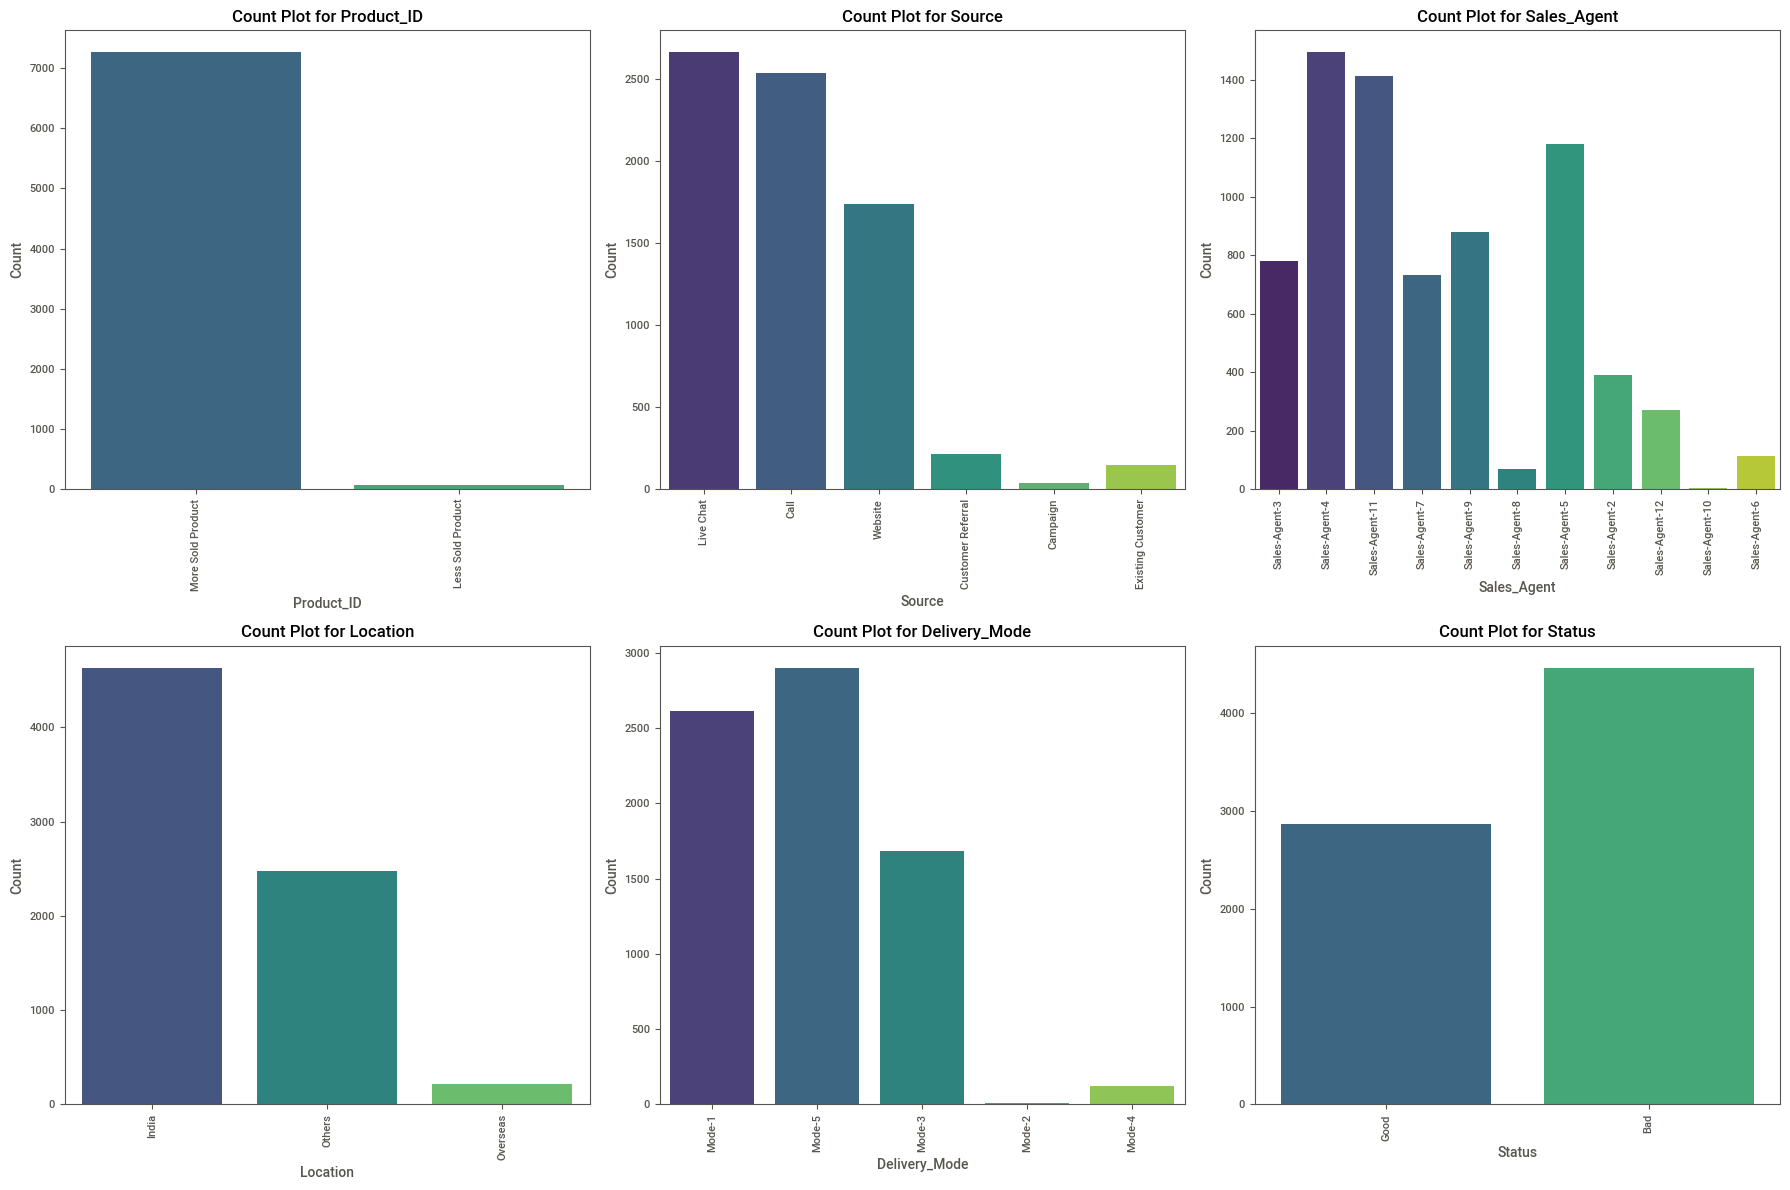

In [38]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (18, 12))

# Convert 2D array to 1D array

axes = axes.flatten()

for i, feature in enumerate(data_new.columns):
    if data_new[feature].dtype == 'O': 
        sns.countplot(data = data_new, x = feature, palette = 'viridis', ax = axes[i])
        axes[i].set_title(f'Count Plot for {feature}')
        axes[i].set_xlabel(f'{feature}')
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis = 'x', rotation = 90)


plt.tight_layout()

plt.show()

**Observations:**
    
1. **More Sold Product** are comparatively much **higher** in number than the **Less Sold Product**.

2. Source of communication through **Live Chat**, **Call** and **Website** are frequent than other sources.

3. **Sales Agent-4, -5 and -11** are among the **top 3** list of Agents who successfully sold the products.

4. **India** is the top location from where the order was made for the products as compared to other locations.

5. The most common mode to deliver the products is **Delivery Mode-5**.

6. Most of the Status for the Product is in **Bad category** (i.e., LOST, In Progress Negative, Not Responding, Junk Lead, Just Enquiry).

##### Pie Chart for Each Features

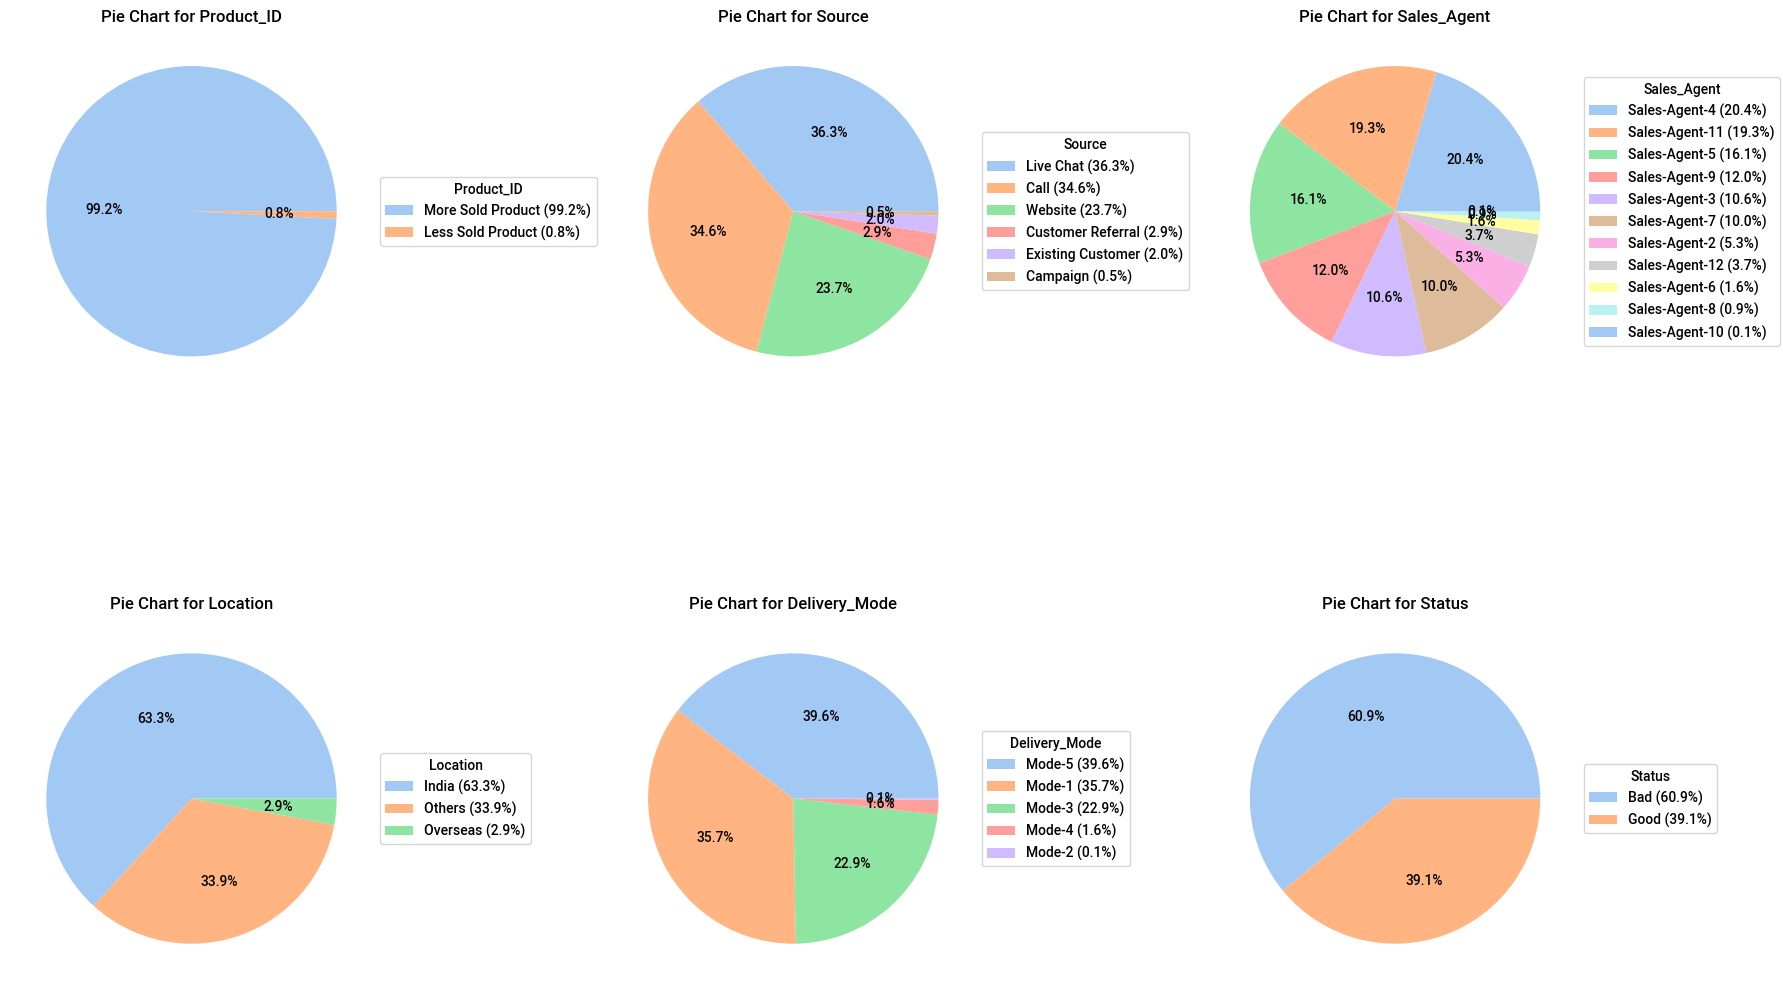

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Use Seaborn's "pastel" color palette
pastel_palette = sns.color_palette('pastel')

for i, feature in enumerate(data_new.columns):
    if data_new[feature].dtype == 'O':
        category_counts = data_new[feature].value_counts()

        # Calculate percentages for the legend
        percentages = 100 * category_counts / category_counts.sum()

        # Use ax.pie and ax.legend with pastel colors
        ax = axes[i]
        ax.pie(category_counts, labels = None, autopct = lambda p: f'{p:.1f}%', colors = pastel_palette)
        ax.set_title(f'Pie Chart for {feature}')

        # Display the custom legend with percentages
        legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(category_counts.index, percentages)]
        ax.legend(legend_labels, title = feature, loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.subplots_adjust(wspace = 0.5, hspace = 0.5) 
plt.tight_layout()
plt.show()

**Observations:**
    
1. Almost 99.2% of the product are under **More Sold Product** category and only 0.8% falls in Less Sold Category.

2. Source of communication through **Live Chat** which is almost 36.3% and **Call** with 34.5% are the most common way to connect with the company.

3. **Sales Agent-4 (20.4%), Sales Aget-11 (19.3) and Sales Agent-5 (16.1%)** are most successful in selling the products.

4. **India** with 63.3% is the place where FicZon is having a good business.

5. The most common mode to deliver the products is **Delivery Mode-5 with 39.6% of total Mode of Delivery**.

6. Almost 60.9% of the productis falling in **Bad category** status.

### Bivariate Analysis

##### Plotting graph to show how each 'Feature' affects the 'Status'

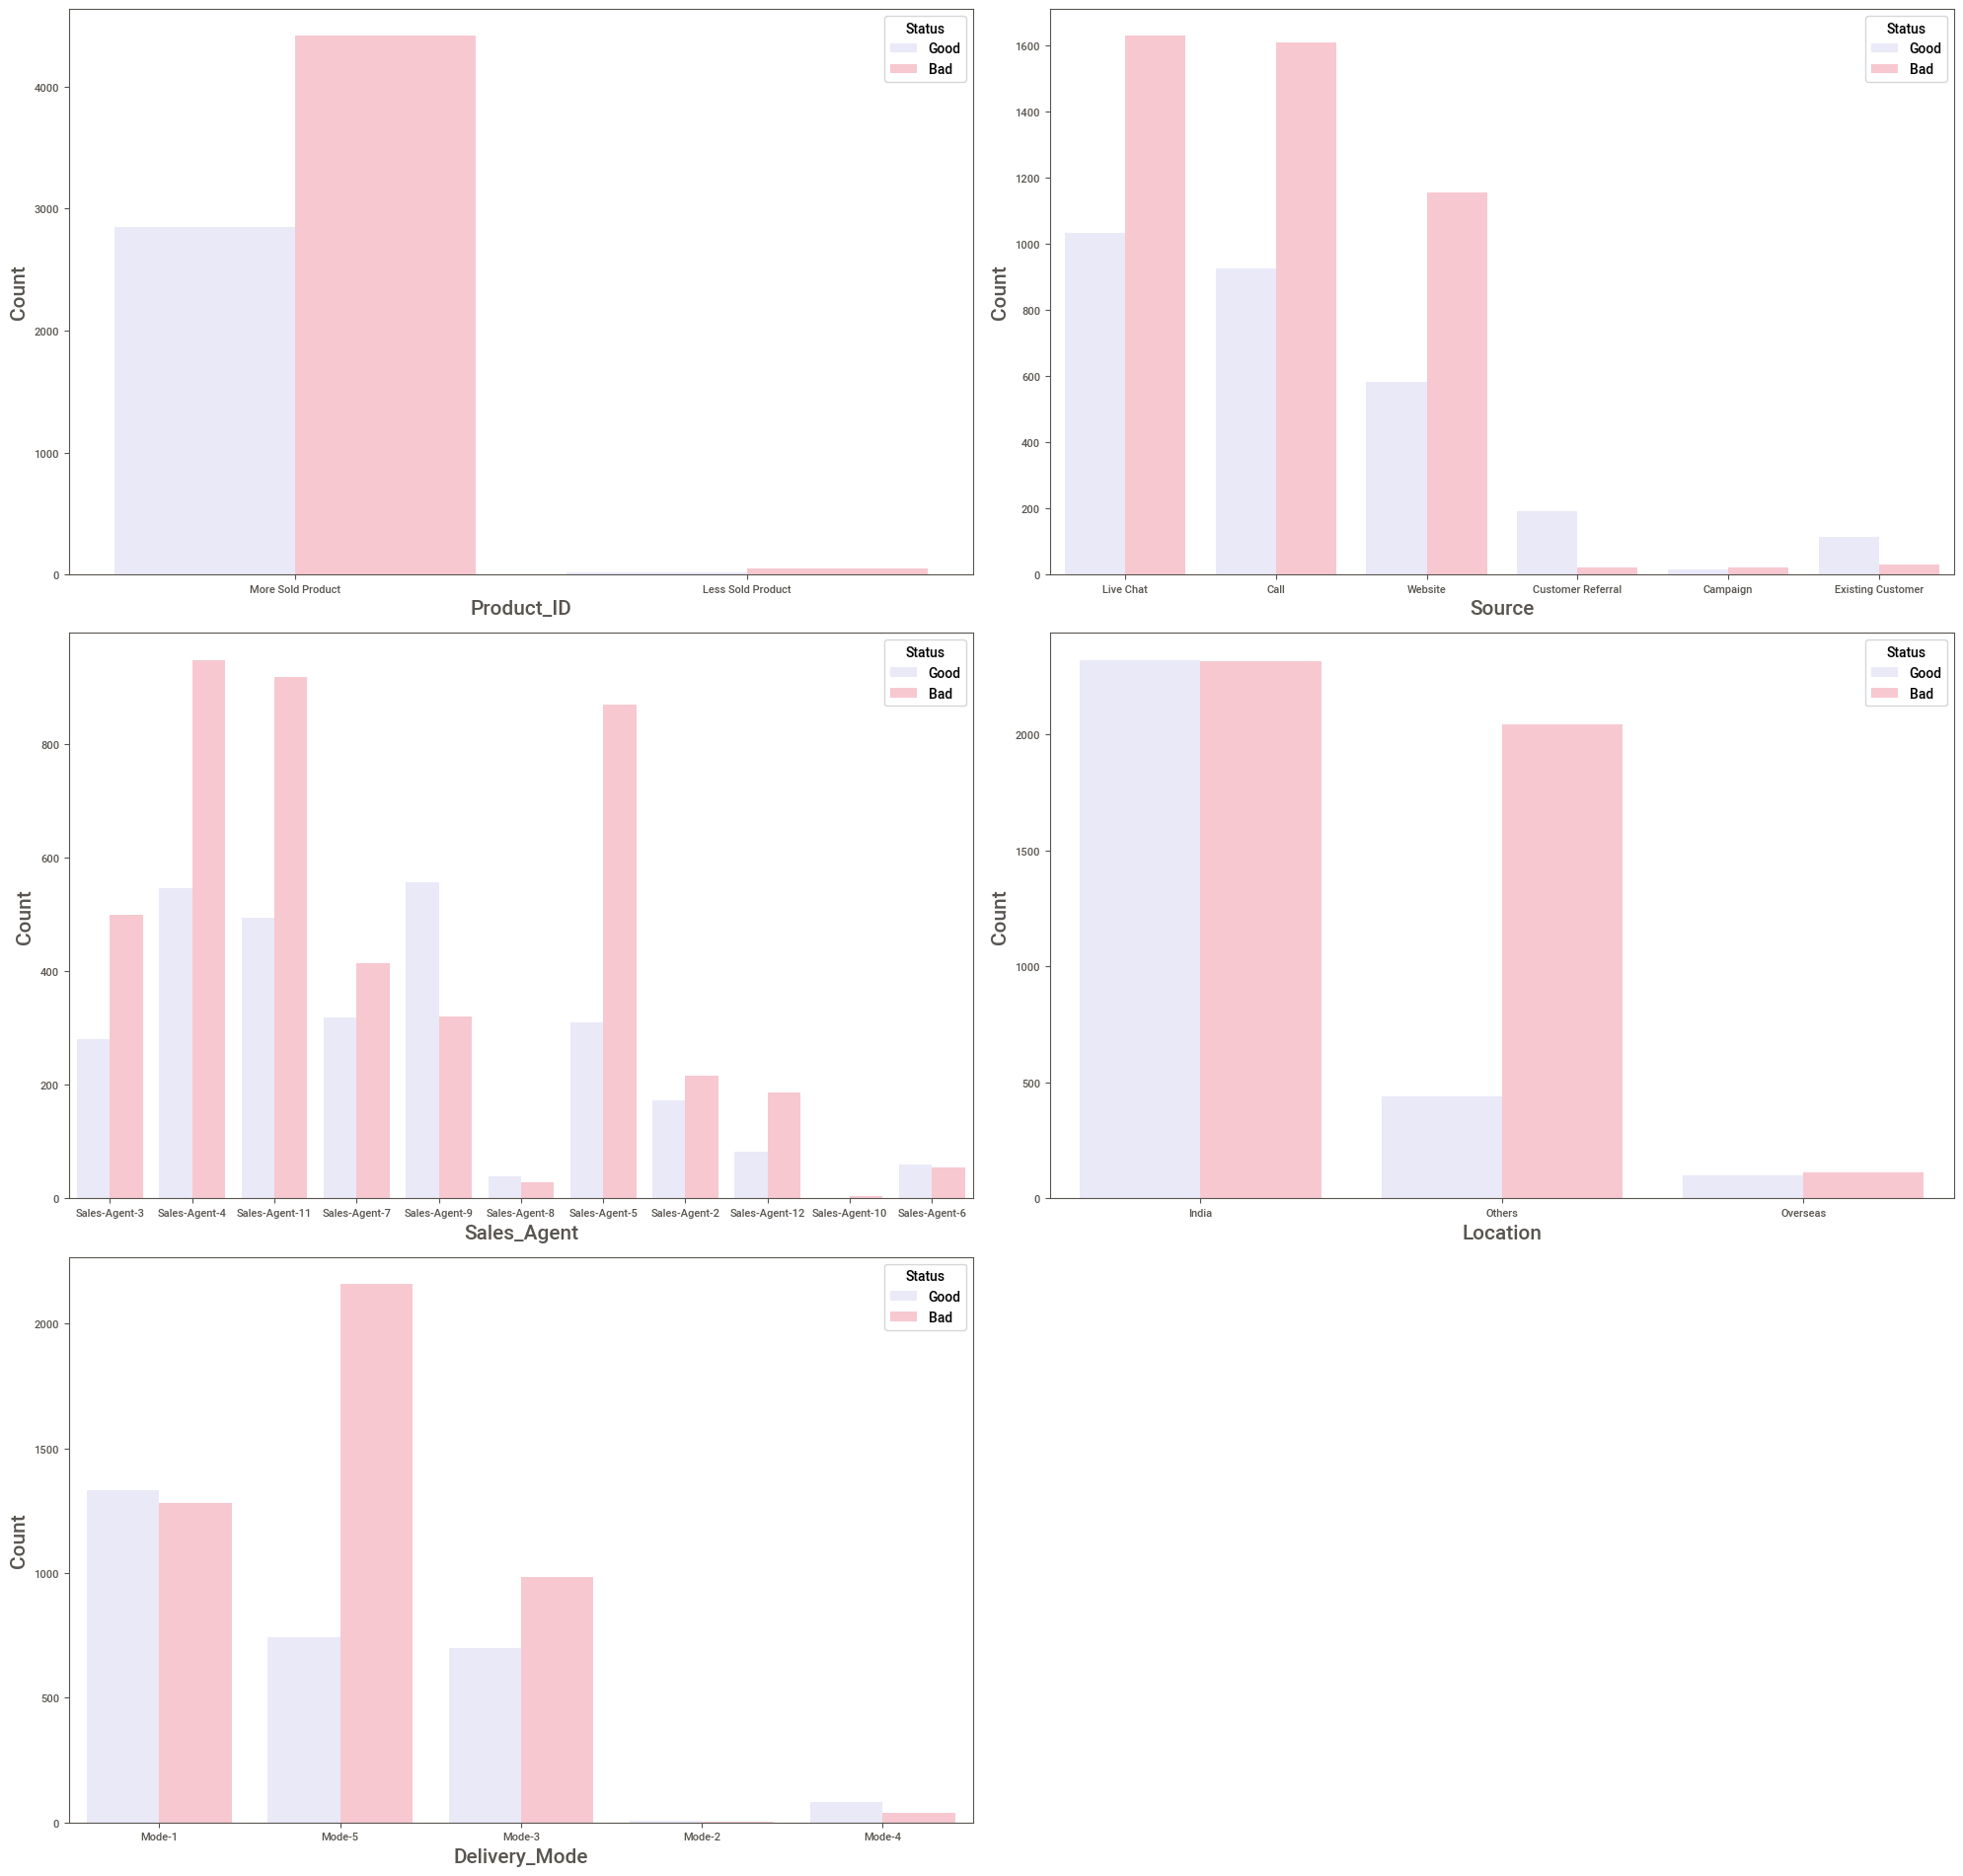

In [40]:
# Defining 'Status' as the Dependent variable

dependent_variable = data_new['Status']

# Defining all other columns as Independent Variables

independent_variables = data_new.drop('Status', axis = 1)

palette = sns.color_palette(['lavender', 'pink'])

plt.figure(figsize=(20, 25), facecolor='white')
plot_number = 1

for column in independent_variables.columns:
    if plot_number <= len(independent_variables.columns):
        plt.subplot(4, 2, plot_number)
        sns.countplot(x = column, hue = 'Status', data = data_new, palette = palette)
        plt.xlabel(column, fontsize = 15)
        plt.ylabel('Count', fontsize = 15)
        plot_number += 1

plt.tight_layout()
plt.show()

**Observation:**
1. Most of the **More Sold Product** is in "Bad Category" of Status and has the **Low Potential Lead**.

2. **Live Chat**, **Call**  and **Website** have the highest no. of **High Potential Lead** but at the same time maximum number of Low Potential Lead too.

3. **Sales Agent-9** has most number of **High Potential Lead** followed by Sales_Agent 4, 5 and 11 having more leads but most of them are of **Low Potential**.

4. Most of the **Low Potential Lead** are from **Other Locations** category.

5. **Delivery Mode-2** has only **High Potential Lead** with almost NO Low Potential Lead and **Delivery Mode-4** also has **High Potential Lead** with little Low Potential Lead.

# Data Preprocessing

In [41]:
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,More Sold Product,Live Chat,Sales-Agent-3,India,Mode-1,Good
1,More Sold Product,Call,Sales-Agent-4,Others,Mode-5,Good
2,More Sold Product,Website,Sales-Agent-11,India,Mode-1,Good
3,More Sold Product,Website,Sales-Agent-7,India,Mode-1,Bad
4,More Sold Product,Call,Sales-Agent-7,India,Mode-1,Good
...,...,...,...,...,...,...
7323,More Sold Product,Call,Sales-Agent-6,India,Mode-4,Bad
7324,More Sold Product,Call,Sales-Agent-12,Others,Mode-5,Bad
7325,More Sold Product,Live Chat,Sales-Agent-11,India,Mode-1,Bad
7326,More Sold Product,Existing Customer,Sales-Agent-4,Others,Mode-1,Bad


##### Checking for Missing Values

In [42]:
data_new.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

**Observation:**
- No missing values present

##### Getting column names with Categorical data type

In [43]:
data_new.select_dtypes(include = ['object']).head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,More Sold Product,Live Chat,Sales-Agent-3,India,Mode-1,Good
1,More Sold Product,Call,Sales-Agent-4,Others,Mode-5,Good
2,More Sold Product,Website,Sales-Agent-11,India,Mode-1,Good
3,More Sold Product,Website,Sales-Agent-7,India,Mode-1,Bad
4,More Sold Product,Call,Sales-Agent-7,India,Mode-1,Good


**Observation:**
- Columns with Categorical Data types are as follows:
1. Product_ID
2. Source
3. Sales_Agent
4. Location
5. Delivery_Mode
6. Status

##### Converting Categorical Data into Numerical Data

#### Handling 'Product_ID' column

In [44]:
data_new.Product_ID.unique()

array(['More Sold Product', 'Less Sold Product'], dtype=object)

In [45]:
data_new['Product_ID'] = data_new['Product_ID'].map({'More Sold Product': 1, 
                                                     'Less Sold Product': 0})

#### Handling 'Source' column

In [46]:
data_new.Source.unique()

array(['Live Chat', 'Call', 'Website', 'Customer Referral', 'Campaign',
       'Existing Customer'], dtype=object)

In [47]:
data_new['Source'] = data_new['Source'].map({'Live Chat': 1, 
                                             'Call': 2, 
                                             'Website': 3, 
                                             'Customer Referral': 4, 
                                             'Campaign': 5, 
                                             'Existing Customer': 6})

#### Handling 'Sales_Agent' column

In [48]:
data_new.Sales_Agent.unique()

array(['Sales-Agent-3', 'Sales-Agent-4', 'Sales-Agent-11',
       'Sales-Agent-7', 'Sales-Agent-9', 'Sales-Agent-8', 'Sales-Agent-5',
       'Sales-Agent-2', 'Sales-Agent-12', 'Sales-Agent-10',
       'Sales-Agent-6'], dtype=object)

In [49]:
data_new['Sales_Agent'] = data_new['Sales_Agent'].map({'Sales-Agent-2': 2, 
                                                       'Sales-Agent-3': 3, 
                                                       'Sales-Agent-4': 4, 
                                                       'Sales-Agent-5': 5, 
                                                       'Sales-Agent-6': 6, 
                                                       'Sales-Agent-7': 7, 
                                                       'Sales-Agent-8': 8, 
                                                       'Sales-Agent-9': 9, 
                                                       'Sales-Agent-10': 10, 
                                                       'Sales-Agent-11': 11, 
                                                       'Sales-Agent-12': 12})

#### Handling 'Location' column

In [50]:
data_new.Location.unique()

array(['India', 'Others', 'Overseas'], dtype=object)

In [51]:
data_new['Location'] = data_new['Location'].map({'India': 0, 'Overseas': 1, 'Others': 2})

#### Handling 'Delivery_Mode' column

In [52]:
data_new.Delivery_Mode.unique()

array(['Mode-1', 'Mode-5', 'Mode-3', 'Mode-2', 'Mode-4'], dtype=object)

In [53]:
data_new['Delivery_Mode'] = data_new['Delivery_Mode'].map({'Mode-1': 1, 
                                                           'Mode-2': 2,
                                                           'Mode-3': 3, 
                                                           'Mode-4': 4, 
                                                           'Mode-5': 5})

#### Handling 'Status' column

In [54]:
data_new.Status.unique()

array(['Good', 'Bad'], dtype=object)

In [55]:
data_new['Status'] = data_new['Status'].map({'Bad': 0, 'Good': 1})

##### Re-checking for any column/s  with Categorical Data Type

In [56]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7328 non-null   int64
 1   Source         7328 non-null   int64
 2   Sales_Agent    7328 non-null   int64
 3   Location       7328 non-null   int64
 4   Delivery_Mode  7328 non-null   int64
 5   Status         7328 non-null   int64
dtypes: int64(6)
memory usage: 343.6 KB


**Observation:**
- No Categorical Data type present

##### Checking for Outliers

In [57]:
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,1,1,3,0,1,1
1,1,2,4,2,5,1
2,1,3,11,0,1,1
3,1,3,7,0,1,0
4,1,2,7,0,1,1
...,...,...,...,...,...,...
7323,1,2,6,0,4,0
7324,1,2,12,2,5,0
7325,1,1,11,0,1,0
7326,1,6,4,2,1,0


##### Box Plot

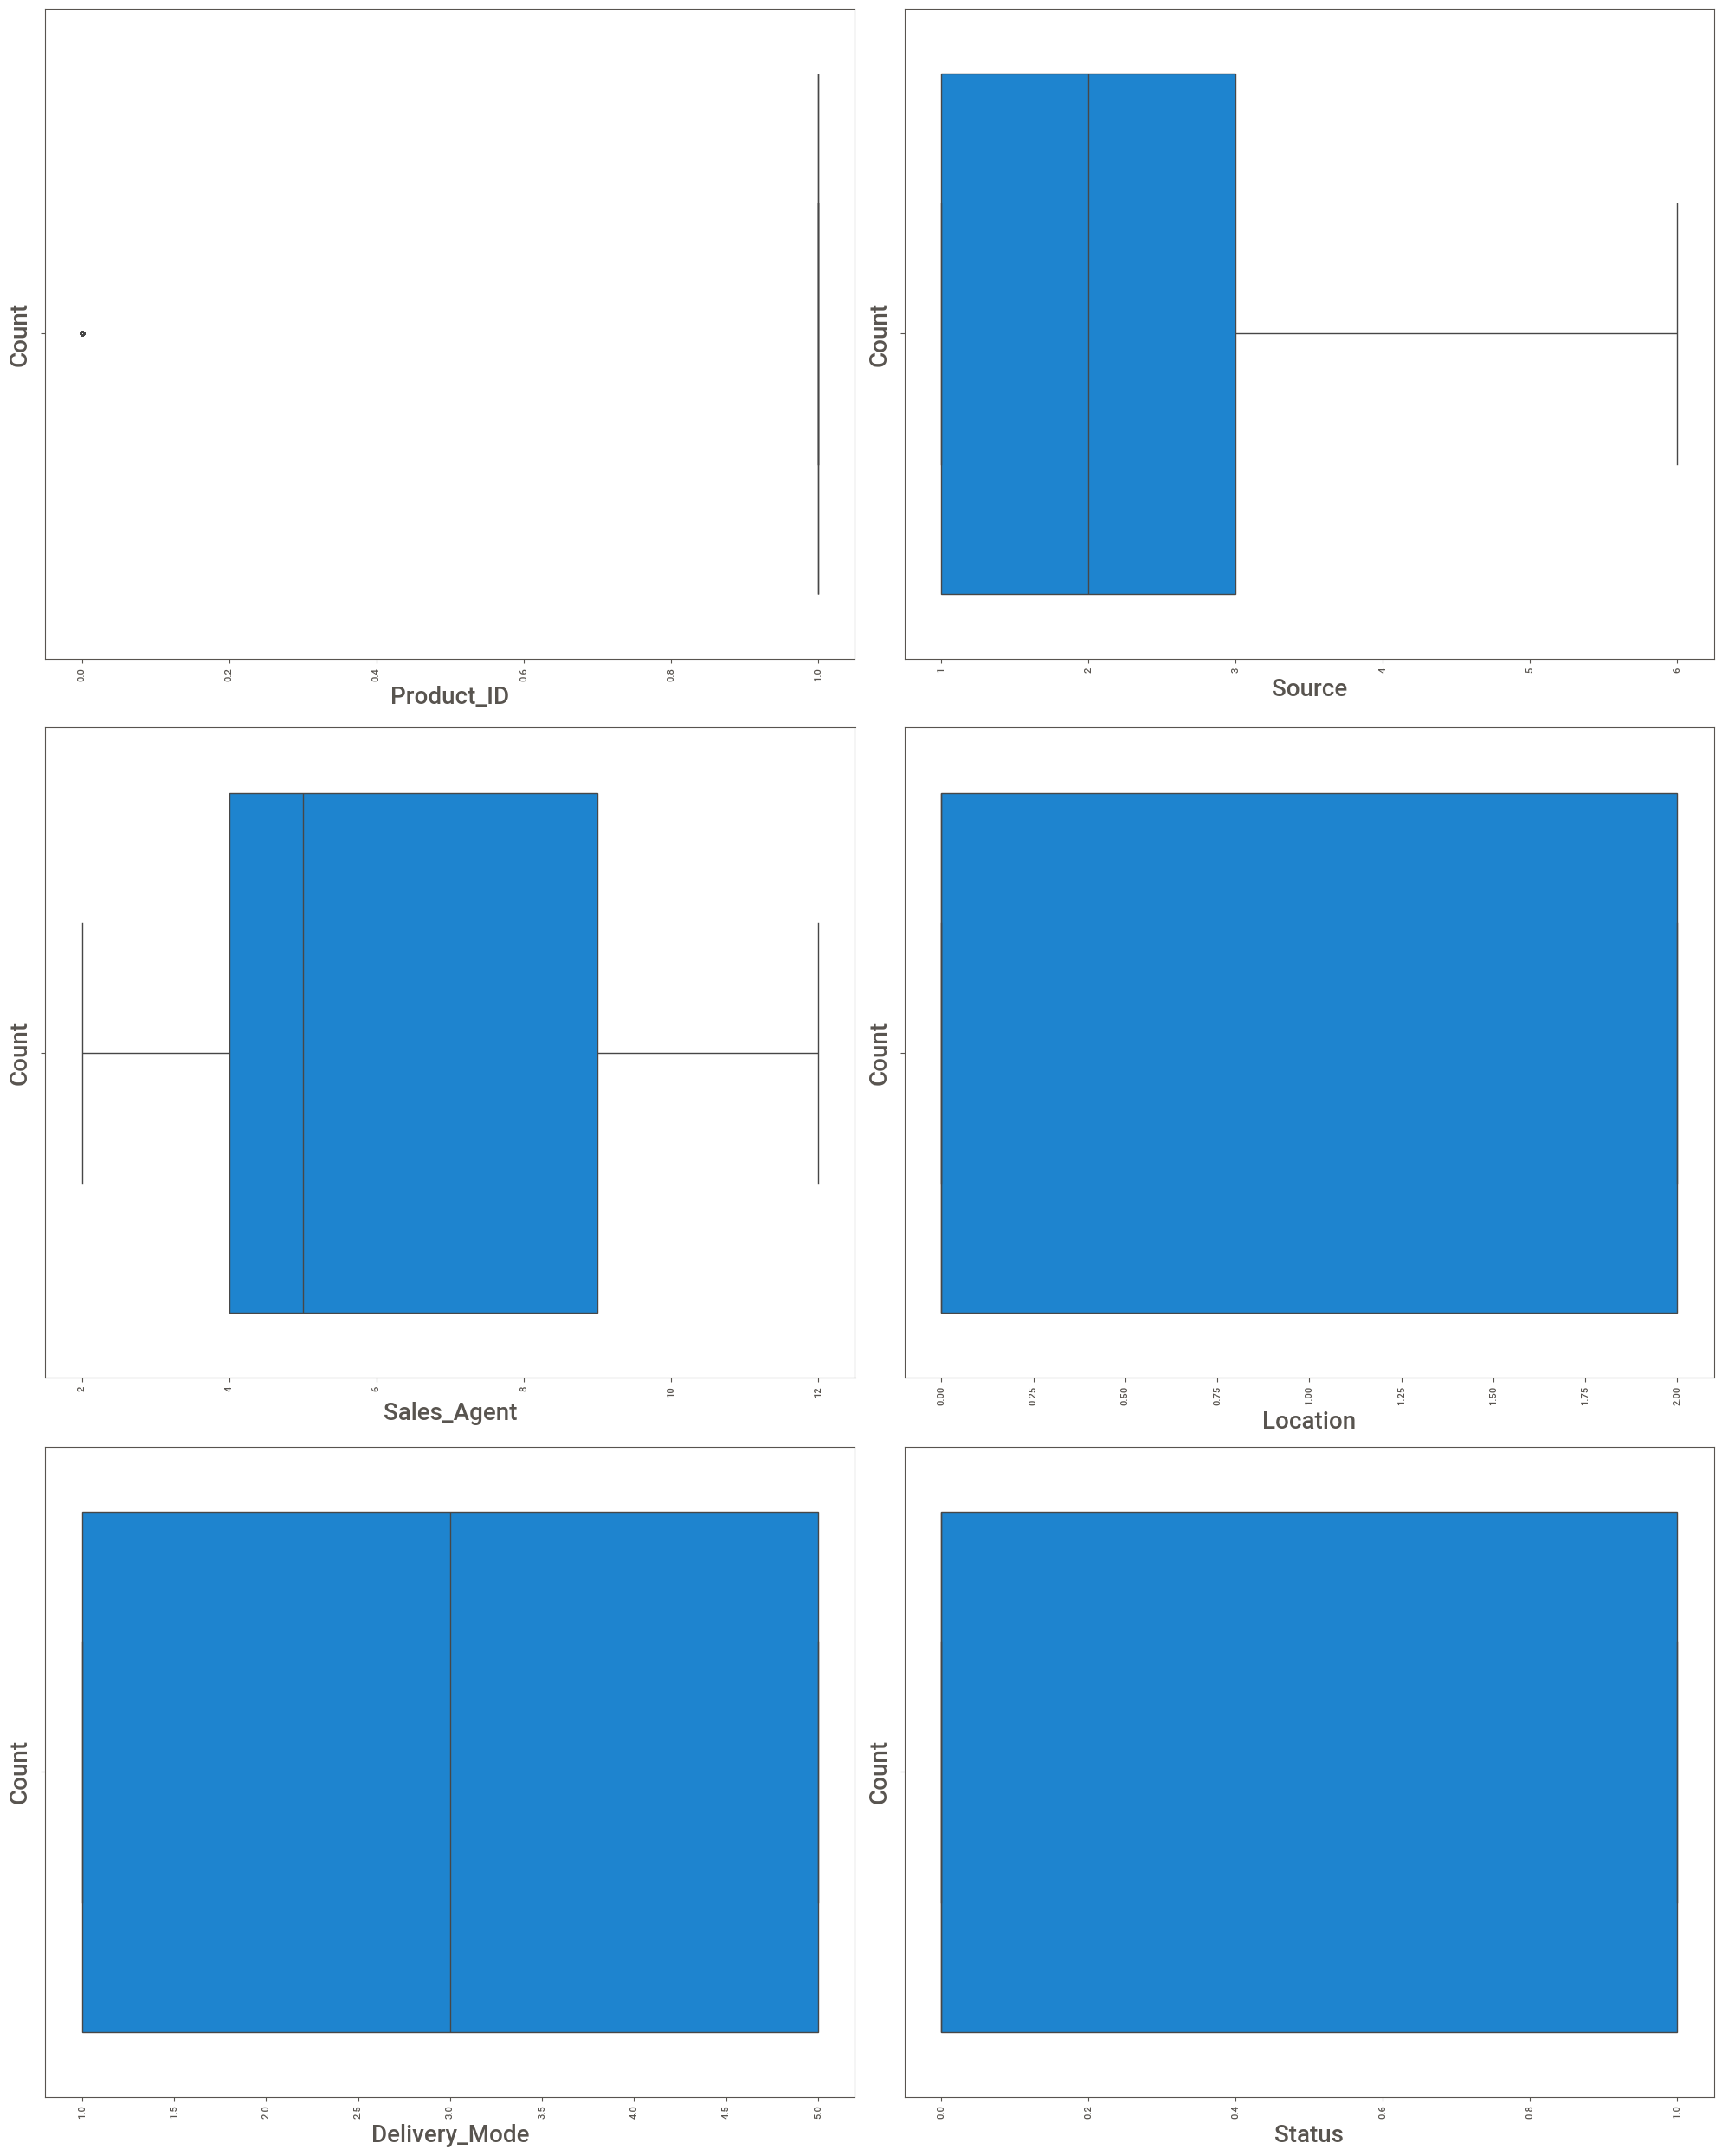

In [58]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnum = 1

for column in data_new:
    plt.subplot(3, 2, plotnum)
    sns.boxplot(x = data_new[column])
    plt.xlabel(column, fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.xticks(rotation = 90)
    
    plotnum = plotnum + 1
    
plt.tight_layout()
plt.show()

**Observation:**
- No Outliers Present

# Feature Engineering

In [59]:
data_new

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,1,1,3,0,1,1
1,1,2,4,2,5,1
2,1,3,11,0,1,1
3,1,3,7,0,1,0
4,1,2,7,0,1,1
...,...,...,...,...,...,...
7323,1,2,6,0,4,0
7324,1,2,12,2,5,0
7325,1,1,11,0,1,0
7326,1,6,4,2,1,0


In [60]:
data_new.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.013737,-0.009963,-0.032036,-0.010441,0.031194
Source,0.013737,1.000000,0.038102,0.035436,-0.013576,0.096997
Sales_Agent,-0.009963,0.038102,1.000000,-0.003334,0.076213,0.043082
Location,-0.032036,0.035436,-0.003334,1.000000,0.355235,-0.309201
Delivery_Mode,-0.010441,-0.013576,0.076213,0.355235,1.000000,-0.220445
Status,0.031194,0.096997,0.043082,-0.309201,-0.220445,1.000000


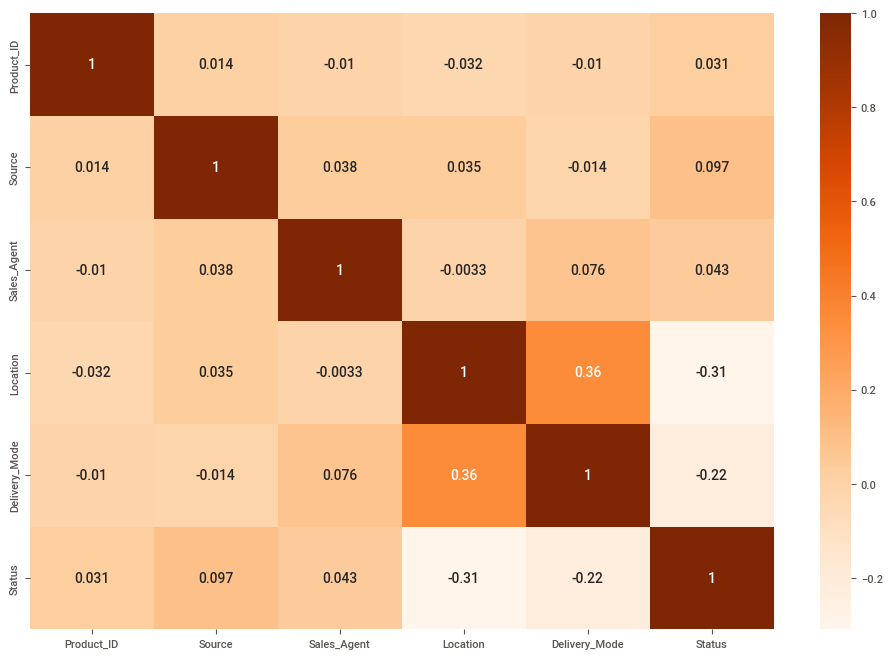

In [61]:
plt.figure(figsize = (12, 8))

sns.heatmap(data_new.corr(), annot = True, cmap = 'Oranges')

plt.show()

**Observation:**
- No highly correlated features

##### Creating Train-Test Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
# Defining Independent and Dependent variables

X = data_new.drop('Status', axis = 1)  

y = data_new['Status']

In [64]:
# Create a train-test split (e.g., 80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [65]:
# Displaying the shapes of the resulting Train and Test sets

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5862, 5)
X_test shape: (1466, 5)
y_train shape: (5862,)
y_test shape: (1466,)


In [66]:
train_data_balance = y_train.value_counts()

# Display the distribution
print(train_data_balance)

Status
0    3596
1    2266
Name: count, dtype: int64


#### Balancing of Data

In [67]:
!pip install -U scikit-learn imbalanced-learn

  Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata (14 kB)


In [68]:
# SMOTE for Sampling technique

from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X_train, y_train)

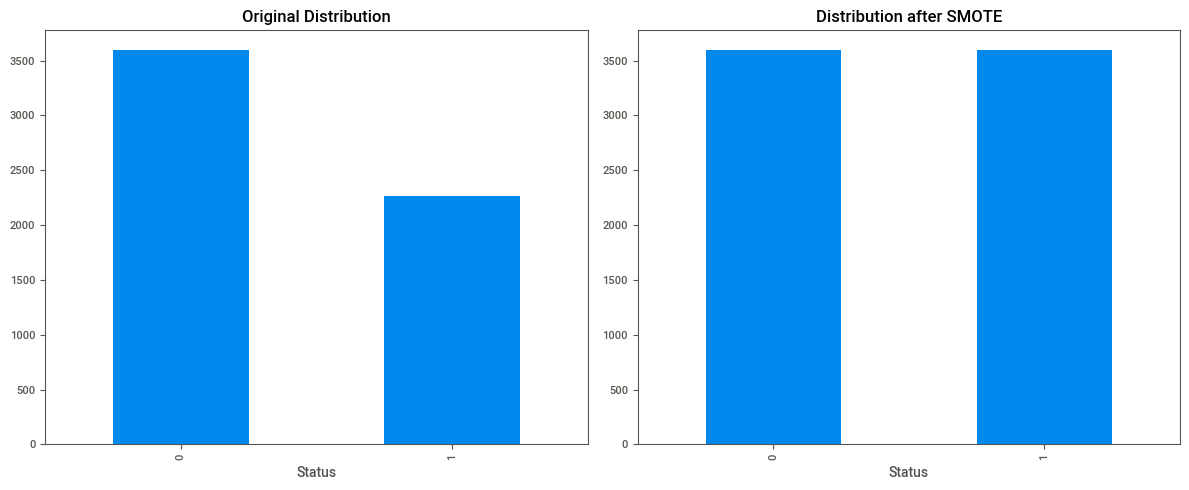

In [69]:
# Create subplots to compare the distributions between Original and After Smote Distribution 

fig, axs = plt.subplots(1, 2, figsize = (12, 5))

# Plot the original distribution

axs[0].set_title('Original Distribution')
y_train.value_counts().plot(kind = 'bar', ax = axs[0])

# Plot the distribution after SMOTE

axs[1].set_title('Distribution after SMOTE')
pd.Series(y_smote).value_counts().plot(kind = 'bar', ax = axs[1])

plt.tight_layout()
plt.show()

### BUSINESS CASE 2: To create ML model to predict the Lead Category (High Potential , Low Potential)

### Model Creation

#### 1. LOGISTIC REGRESSION ALGORITHM

In [70]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_smote, y_smote)

LogisticRegression()

In [71]:
y_pred_LR = lr.predict(X_test)

y_pred_LR

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

##### Model Evaluation for Logistic Regression Algorithm

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [73]:
# Confusion Matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)

# Accuracy Score
acc_LR = accuracy_score(y_test, y_pred_LR)

# Recall
recall_LR = recall_score(y_test, y_pred_LR)

# Precision
precision_LR = precision_score(y_test, y_pred_LR)

# f1 Score
f1_LR = f1_score(y_test, y_pred_LR)

# Classification Report
cr_LR = classification_report(y_test, y_pred_LR)

In [74]:
print(cm_LR)
print(acc_LR)
print(recall_LR)
print(precision_LR)
print(f1_LR)
print(cr_LR)

[[483 387]
 [139 457]]
0.6412005457025921
0.7667785234899329
0.5414691943127962
0.6347222222222222
              precision    recall  f1-score   support

           0       0.78      0.56      0.65       870
           1       0.54      0.77      0.63       596

    accuracy                           0.64      1466
   macro avg       0.66      0.66      0.64      1466
weighted avg       0.68      0.64      0.64      1466



#### 2. SUPPORT VECTOR MACHINE ALGORITHM

In [75]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', C = 30, gamma = 'auto')

svm.fit(X_smote, y_smote)

SVC(C=30, gamma='auto')

In [76]:
y_pred_SVM = svm.predict(X_test)

y_pred_SVM

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

##### Model Evaluation for SVM

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [78]:
# Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_pred_SVM)

# Accuracy Score
acc_SVM = accuracy_score(y_test, y_pred_SVM)

# Recall
recall_SVM = recall_score(y_test, y_pred_SVM)

# Precision
precision_SVM = precision_score(y_test, y_pred_SVM)

# f1 Score
f1_SVM = f1_score(y_test, y_pred_SVM)

# Classification Report
cr_SVM = classification_report(y_test, y_pred_SVM)

In [79]:
print(cm_SVM)
print(acc_SVM)
print(recall_SVM)
print(precision_SVM)
print(f1_SVM)
print(cr_SVM)

[[559 311]
 [177 419]]
0.6671214188267395
0.7030201342281879
0.5739726027397261
0.6319758672699849
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       870
           1       0.57      0.70      0.63       596

    accuracy                           0.67      1466
   macro avg       0.67      0.67      0.66      1466
weighted avg       0.68      0.67      0.67      1466



#### 3. NAIVE-BAYES ALGORITHM

In [80]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_smote, y_smote)

GaussianNB()

In [81]:
y_pred_NB = gnb.predict(X_test)

y_pred_NB

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

##### Model Evaluation for Naive-Bayes Algorithm 

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [83]:
# Confusion Matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)

# Accuracy Score
acc_NB = accuracy_score(y_test, y_pred_NB)

# Recall
recall_NB = recall_score(y_test, y_pred_NB)

# Precision
precision_NB = precision_score(y_test, y_pred_NB)

# f1 Score
f1_NB = f1_score(y_test, y_pred_NB)

# Classification Report
cr_NB = classification_report(y_test, y_pred_NB)

In [84]:
print(cm_NB)
print(acc_NB)
print(recall_NB)
print(precision_NB)
print(f1_NB)
print(cr_NB)

[[425 445]
 [101 495]]
0.6275579809004093
0.8305369127516778
0.526595744680851
0.64453125
              precision    recall  f1-score   support

           0       0.81      0.49      0.61       870
           1       0.53      0.83      0.64       596

    accuracy                           0.63      1466
   macro avg       0.67      0.66      0.63      1466
weighted avg       0.69      0.63      0.62      1466



#### 4. DECISION TREE ALGORITHM

In [85]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')

DT.fit(X_smote, y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [86]:
y_pred_DT = DT.predict(X_test)

y_pred_DT

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

##### Model Evaluation for Decision Tree Algorithm

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [88]:
# Confusion Matrix
cm_DT = confusion_matrix(y_test, y_pred_DT)

# Accuracy Score
acc_DT = accuracy_score(y_test, y_pred_DT)

# Recall
recall_DT = recall_score(y_test, y_pred_DT)

# Precision
precision_DT = precision_score(y_test, y_pred_DT)

# f1 Score
f1_DT = f1_score(y_test, y_pred_DT)

# Classification Report
cr_DT = classification_report(y_test, y_pred_DT)

In [89]:
print(cm_DT)
print(acc_DT)
print(recall_DT)
print(precision_DT)
print(f1_DT)
print(cr_DT)

[[533 337]
 [170 426]]
0.6541609822646658
0.714765100671141
0.5583224115334207
0.6269315673289183
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       870
           1       0.56      0.71      0.63       596

    accuracy                           0.65      1466
   macro avg       0.66      0.66      0.65      1466
weighted avg       0.68      0.65      0.66      1466



##### Hyperparameter Tuning 

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
params_DT = {"criterion" : ("gini", "entropy"),
             "splitter" : ("best", "random"), 
             "max_depth" : (list(range(1, 20))),
             "min_samples_split" : [2, 3, 4],
             "min_samples_leaf" : list(range(1, 20))}


clf_DT = DecisionTreeClassifier(random_state = 3)

cv_DT = GridSearchCV(clf_DT, params_DT, scoring = "f1", n_jobs =- 1, verbose = 5, cv = 3)

In [92]:
cv_DT.fit(X_smote, y_smote)   

best_params_DT = cv_DT.best_params_  

print(f"Best paramters: {best_params_DT})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'})


In [93]:
best_criterion = best_params_DT["criterion"]
best_splitter = best_params_DT["splitter"]
best_max_depth = best_params_DT["max_depth"]
best_min_samples_split = best_params_DT["min_samples_split"]
best_min_samples_leaf = best_params_DT["min_samples_leaf"]

best_DT = DecisionTreeClassifier(criterion = best_criterion,
                                 splitter = best_splitter,
                                 max_depth = best_max_depth,
                                 min_samples_split = best_min_samples_split,
                                 min_samples_leaf = best_min_samples_leaf,
                                 random_state = 3)

In [94]:
best_DT.fit(X_smote, y_smote)

new_y_pred_DT = best_DT.predict(X_test)

new_y_pred_DT

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

##### Model Evaluation for New Decision Tree Algorithm after Hyperparameter tuning

In [95]:
# Confusion Matrix
new_cm_DT = confusion_matrix(y_test, new_y_pred_DT)

# Accuracy Score
new_acc_DT = accuracy_score(y_test, new_y_pred_DT)

# Recall
new_recall_DT = recall_score(y_test, new_y_pred_DT)

# Precision
new_precision_DT = precision_score(y_test, new_y_pred_DT)

# f1 Score
new_f1_DT = f1_score(y_test, new_y_pred_DT)

# Classification Report
new_cr_DT = classification_report(y_test, new_y_pred_DT)

In [96]:
print(new_cm_DT)
print(new_acc_DT)
print(new_recall_DT)
print(new_precision_DT)
print(new_f1_DT)
print(new_cr_DT)

[[411 459]
 [ 97 499]]
0.6207366984993179
0.837248322147651
0.5208768267223383
0.6422136422136422
              precision    recall  f1-score   support

           0       0.81      0.47      0.60       870
           1       0.52      0.84      0.64       596

    accuracy                           0.62      1466
   macro avg       0.66      0.65      0.62      1466
weighted avg       0.69      0.62      0.62      1466



#### 5. XGBOOST ALGORITHM

In [97]:
from xgboost import XGBClassifier

xgb_r = XGBClassifier()

xgb_r.fit(X_smote, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [98]:
y_pred_XGB = xgb_r.predict(X_test)

y_pred_XGB

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

##### Model Evaluation for XGBoost Algorithm

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [100]:
# Confusion Matrix
cm_XGB = confusion_matrix(y_test, y_pred_XGB)

# Accuracy Score
acc_XGB = accuracy_score(y_test, y_pred_XGB)

# Recall
recall_XGB = recall_score(y_test, y_pred_XGB)

# Precision
precision_XGB = precision_score(y_test, y_pred_XGB)

# f1 Score
f1_XGB = f1_score(y_test, y_pred_XGB)

# Classification Report
cr_XGB = classification_report(y_test, y_pred_XGB)

In [101]:
print(cm_XGB)
print(acc_XGB)
print(recall_XGB)
print(precision_XGB)
print(f1_XGB)
print(cr_XGB)

[[568 302]
 [190 406]]
0.6643929058663028
0.6812080536912751
0.5734463276836158
0.6226993865030674
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       870
           1       0.57      0.68      0.62       596

    accuracy                           0.66      1466
   macro avg       0.66      0.67      0.66      1466
weighted avg       0.68      0.66      0.67      1466



#### 6. RANDOM FOREST ALGORITHM

In [102]:
from sklearn.ensemble import RandomForestClassifier   

RF = RandomForestClassifier(n_estimators = 100)   

RF.fit(X_smote, y_smote)

RandomForestClassifier()

In [103]:
y_pred_RF = RF.predict(X_test)

y_pred_RF

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

##### Model Evaluation for Random Forest

In [104]:
# Confusion Matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)

# Accuracy Score
acc_RF = accuracy_score(y_test, y_pred_RF)

# Recall
recall_RF = recall_score(y_test, y_pred_RF)

# Precision
precision_RF = precision_score(y_test, y_pred_RF)

# f1 Score
f1_RF = f1_score(y_test, y_pred_RF)

# Classification Report
cr_RF = classification_report(y_test, y_pred_RF)

In [105]:
print(cm_RF)
print(acc_RF)
print(recall_RF)
print(precision_RF)
print(f1_RF)
print(cr_RF)

[[565 305]
 [186 410]]
0.665075034106412
0.6879194630872483
0.5734265734265734
0.6254767353165522
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       870
           1       0.57      0.69      0.63       596

    accuracy                           0.67      1466
   macro avg       0.66      0.67      0.66      1466
weighted avg       0.68      0.67      0.67      1466



##### Hyperparameter Tuning 

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
params_RF = {'n_estimators': [50, 100, 200],
             'max_depth': [None, 5, 10, 15],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4],
             'bootstrap': [True, False]}

clf_RF = RandomForestClassifier(random_state = 3)

cv_RF = GridSearchCV(clf_RF, params_RF, scoring = "f1", n_jobs = -1, verbose = 5, cv = 3)

cv_RF.fit(X_smote, y_smote)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=3), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=5)

In [108]:
best_params_RF = cv_RF.best_params_

print(f"Best parameters: {best_params_RF}")

Best parameters: {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [109]:
best_RF = RandomForestClassifier(random_state = 3, **best_params_RF)

best_RF.fit(X_smote, y_smote)

RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=2,
                       random_state=3)

In [110]:
new_y_pred_RF = best_RF.predict(X_test)

new_y_pred_RF

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,

##### Model Evaluation for New Random Forest Algorithm after Hyperparameter tuning

In [111]:
# Confusion Matrix
new_cm_RF = confusion_matrix(y_test, new_y_pred_RF)

# Accuracy Score
new_acc_RF = accuracy_score(y_test, new_y_pred_RF)

# Recall
new_recall_RF = recall_score(y_test, new_y_pred_RF)

# Precision
new_precision_RF = precision_score(y_test, new_y_pred_RF)

# f1 Score
new_f1_RF = f1_score(y_test, new_y_pred_RF)

# Classification Report
new_cr_RF = classification_report(y_test, new_y_pred_RF)

In [112]:
print(new_cm_RF)
print(new_acc_RF)
print(new_recall_RF)
print(new_precision_RF)
print(new_f1_RF)
print(new_cr_RF)

[[514 356]
 [139 457]]
0.6623465211459755
0.7667785234899329
0.5621156211562116
0.6486870120652946
              precision    recall  f1-score   support

           0       0.79      0.59      0.67       870
           1       0.56      0.77      0.65       596

    accuracy                           0.66      1466
   macro avg       0.67      0.68      0.66      1466
weighted avg       0.70      0.66      0.66      1466



#### 7. K-NEAREST NEIGHBOURS ALGORITHM (K-NN)

In [113]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 12)

KNN.fit(X_smote, y_smote)

KNeighborsClassifier(n_neighbors=12)

In [114]:
y_pred_KNN = KNN.predict(X_test)

y_pred_KNN

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,

##### Model Evaluation for K-NN

In [115]:
# Confusion Matrix
cm_KNN = confusion_matrix(y_test, y_pred_KNN)

# Accuracy Score
acc_KNN = accuracy_score(y_test, y_pred_KNN)

# Recall
recall_KNN = recall_score(y_test, y_pred_KNN)

# Precision
precision_KNN = precision_score(y_test, y_pred_KNN)

# f1 Score
f1_KNN = f1_score(y_test, y_pred_KNN)

# Classification Report
cr_KNN = classification_report(y_test, y_pred_KNN)

In [116]:
print(cm_KNN)
print(acc_KNN)
print(recall_KNN)
print(precision_KNN)
print(f1_KNN)
print(cr_KNN)

[[723 147]
 [353 243]]
0.6589358799454298
0.4077181208053691
0.6230769230769231
0.49290060851926976
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       870
           1       0.62      0.41      0.49       596

    accuracy                           0.66      1466
   macro avg       0.65      0.62      0.62      1466
weighted avg       0.65      0.66      0.64      1466



#### 8. K-MEANS ALGORITHM

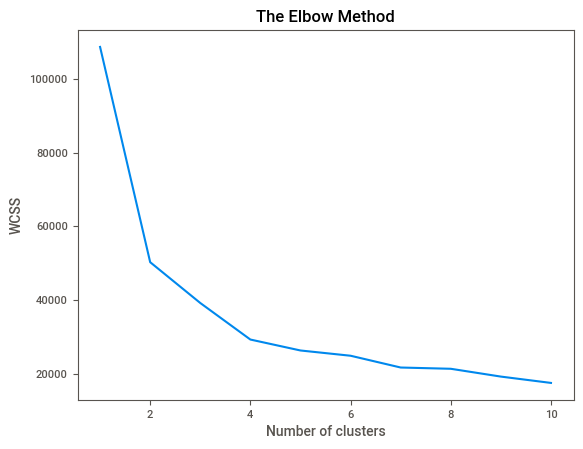

In [117]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
from sklearn.cluster import KMeans

In [119]:
KM = KMeans(n_clusters = 2, random_state = 10)

In [120]:
# Training the model

KM.fit(X)

KMeans(n_clusters=2, random_state=10)

In [121]:
# Labels of the clustersmodel.labels_)

KM.labels_

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,

##### Model Evaluation for K-Means

In [122]:
label = KM.labels_
label

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,

In [123]:
from sklearn.metrics import silhouette_score

ss_KM = silhouette_score(X, label)

ss_KM 

0.4762840799774588

### Displaying the Accuracy Score for the Algorithms

In [124]:
scores = [acc_LR, acc_SVM, acc_NB, acc_DT, new_acc_DT, acc_XGB,  acc_RF, new_acc_RF, acc_KNN]

algorithms = ["Logistic Regression","Support Vector Machine","Naive Bayes","Decision Tree","Decision Tree_HT","XGBoost","Random Forest","Random Forest_HT","K-Nearest Neighbors"]    

for i in range(len(algorithms)): 
    print("The Accuracy Score achieved using " + algorithms[i] + " is: {:.2f}%".format(scores[i] * 100))
    
print("The Silhouette Score achieved using K-Means is : {:.2f}%".format(ss_KM * 100))

The Accuracy Score achieved using Logistic Regression is: 64.12%
The Accuracy Score achieved using Support Vector Machine is: 66.71%
The Accuracy Score achieved using Naive Bayes is: 62.76%
The Accuracy Score achieved using Decision Tree is: 65.42%
The Accuracy Score achieved using Decision Tree_HT is: 62.07%
The Accuracy Score achieved using XGBoost is: 66.44%
The Accuracy Score achieved using Random Forest is: 66.51%
The Accuracy Score achieved using Random Forest_HT is: 66.23%
The Accuracy Score achieved using K-Nearest Neighbors is: 65.89%
The Silhouette Score achieved using K-Means is : 47.63%


### Displaying the f1 Score for the Algorithms

In [125]:
scores = [f1_LR, f1_SVM, f1_NB, f1_DT, new_f1_DT, f1_XGB,  f1_RF, new_f1_RF]

algorithms = ["Logistic Regression","Support Vector Machine","Naive Bayes","Decision Tree","Decision Tree_HT","XGBoost","Random Forest","Random Forest_HT"]    

for i in range(len(algorithms)): 
    print("The F1 Score achieved using " + algorithms[i] + " is: {:.2f}%".format(scores[i] * 100))

The F1 Score achieved using Logistic Regression is: 63.47%
The F1 Score achieved using Support Vector Machine is: 63.20%
The F1 Score achieved using Naive Bayes is: 64.45%
The F1 Score achieved using Decision Tree is: 62.69%
The F1 Score achieved using Decision Tree_HT is: 64.22%
The F1 Score achieved using XGBoost is: 62.27%
The F1 Score achieved using Random Forest is: 62.55%
The F1 Score achieved using Random Forest_HT is: 64.87%


### Tabulate the Results for all the Algorithms

In [126]:
!pip install tabulate

In [127]:
from tabulate import tabulate

In [128]:
data1 = [["LR", acc_LR, recall_LR, precision_LR, f1_LR], 
        ["SVM", acc_SVM, recall_SVM, precision_SVM, f1_SVM],
        ["Naive-Bayes", acc_NB, recall_NB, precision_NB, f1_NB],
        ["Decision Tree", acc_DT, recall_DT, precision_DT, f1_DT],
        ["Decision Tree_HT", new_acc_DT, new_recall_DT, new_precision_DT, new_f1_DT],
        ["XGBoost", acc_XGB, recall_XGB, precision_XGB, f1_XGB],
        ["Random Forest", acc_RF, recall_RF, precision_RF, f1_RF],
        ["Random Forest_HT", new_acc_RF, new_recall_RF, new_precision_RF, new_f1_RF]]

col_names1 = ["Algorithm", "Accuracy Score", "Recall Score", "Precision Score", "F1 Score"]

print(tabulate(data1, headers = col_names1, tablefmt = "fancy_grid", floatfmt = ".2%"))


data2 = [["K-Means", ss_KM]]

col_names2 = ["Algorithm", "Silhouette Score"]

print(tabulate(data2, headers = col_names2, tablefmt = "fancy_grid", floatfmt = ".2%"))

╒══════════════════╤══════════════════╤════════════════╤═══════════════════╤════════════╕
│ Algorithm        │   Accuracy Score │   Recall Score │   Precision Score │   F1 Score │
╞══════════════════╪══════════════════╪════════════════╪═══════════════════╪════════════╡
│ LR               │           64.12% │         76.68% │            54.15% │     63.47% │
├──────────────────┼──────────────────┼────────────────┼───────────────────┼────────────┤
│ SVM              │           66.71% │         70.30% │            57.40% │     63.20% │
├──────────────────┼──────────────────┼────────────────┼───────────────────┼────────────┤
│ Naive-Bayes      │           62.76% │         83.05% │            52.66% │     64.45% │
├──────────────────┼──────────────────┼────────────────┼───────────────────┼────────────┤
│ Decision Tree    │           65.42% │         71.48% │            55.83% │     62.69% │
├──────────────────┼──────────────────┼────────────────┼───────────────────┼────────────┤
│ Decision

#### SUMMARY OF THE PROJECT

FicZon Inc, an IT solution provider, relies heavily on digital channels for leads, particularly through their website. With a significant dependence on sales force effectiveness, FicZon has experienced a decline in sales due to market maturation and increased competition.

The current lead quality assessment relies on manual categorization by the sales staff, with a post-analysis focus. Recognizing the need for improvement, FicZon initiated a project with the goal of leveraging Machine Learning (ML) to pre-categorize leads, anticipating a substantial boost in sales effectiveness.

The project's primary objectives included data exploration insights into sales effectiveness and the development of an ML model capable of predicting lead categories (High Potential or Low Potential). Various machine learning models were employed to achieve these goals. 

The implementation of ML aimed to enhance the accuracy and efficiency of lead categorization, ensuring a proactive approach to sales, and addressing the challenges posed by market dynamics and emerging competitors.

The dataset for the Business case was obtained through SQL server using MySQL Workbench. It has 7422 rows × 9 columns with column names as 'Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location', 'Delivery_Mode' and 'Status'. The dataset contains all these details for 7422 products which were sold to different customers. 

It is a Supervised Learning Classification problem with input features as Categorical Data and target as the 'Status' where different values are recorded providing whether that particular Product is at what stage (Open, lost, Just Enquiry etc). The predictor variables as well as the target variable 'Status' is nominal type.

Machine Learning algorithms used:

1. Logistic Regression
2. Support Vector Machine
3. Naive-Bayes
4. Decision Tree
5. XGBoost
6. Random Forest
7. K-nearest Neighbours
8. K-Means

#### Methodology:
Most of the columns have a lot of different unique labels. Hence, these labels were merged and new labels were formed categorizing the labels with similar features into one group. After categorizing, the categorical data were converted to Numerical type using Label Encoding Technique.

The Target variable 'Status' was categorized into 'Good' and 'Bad' which referred to High Potential and Low Potential Lead respectively.

SMOTE is used for balancing the sample data. After various Data Preprocessing and Feature Engineering Process, different Machine Learning Algorithms like Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, XGBoost, K-Means, K-NN and Naive-Bayes algorithms were used for prediction.

#### CONCLUSION

The Main purpose of the project was to find out the Lead Quality which can significantly increase the sales.

After trying various Machine Learning Model on the given data set, based on the Accuracy score, Recall score, Precision score and F1 score, it can be concluded that out of all the algorithms, **Support Vector Machine** is performing best with highest accuracy score.

**It can concluded that SUPPORT VECTOR MACHINE (SVM) algorithm is the best performing model on this Data set.**